In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
df = pd.read_csv('../data/processed/uk_sessions_2022-01-01_2022-11-01.csv')
df = df.rename(columns={'ENERGY_DELIVERED_KWH':'ENERGY'})
df['SESSION_STOP'] = pd.to_datetime(df['SESSION_STOP'])
df['DATE'] = df['SESSION_STOP'].dt.date
df_daily = df.groupby(['LOCATION_ID', 'DATE']).sum('ENERGY')
df_locations = df_daily.groupby('LOCATION_ID')

In [10]:
df1 = dict(list(df_locations))[766827].droplevel(level=0)
df1.sort_index(inplace=True)

In [11]:
print(df1['ENERGY'].autocorr(lag=1))
print(df1['ENERGY'].autocorr(lag=2))
print(df1['ENERGY'].autocorr(lag=3))
print(df1['ENERGY'].autocorr(lag=4))

0.6337966198887572
0.5118181204753129
0.4451599549539851
0.48615748876966364


In [12]:
df1['ENERGY']

DATE
2022-01-01     664.015
2022-01-02     646.950
2022-01-03    1141.525
2022-01-04    1037.250
2022-01-05     869.325
                ...   
2022-10-27    2961.670
2022-10-28    2601.069
2022-10-29    2755.868
2022-10-30    2814.614
2022-10-31    3237.099
Name: ENERGY, Length: 303, dtype: float64

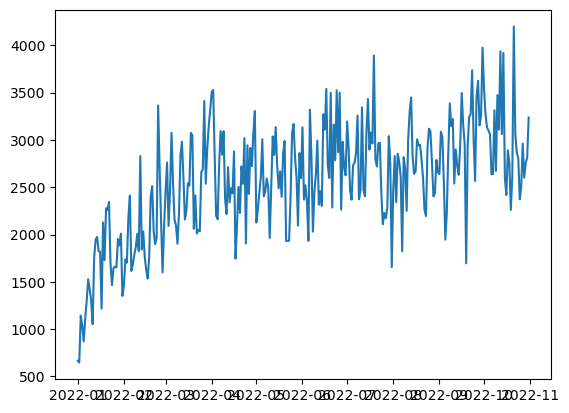

In [13]:
plt.plot(df1['ENERGY'])

In [16]:
result_add = seasonal_decompose(df1['ENERGY'], model ='add')
result_add.plot();
result_mul = seasonal_decompose(df1['ENERGY'], model = 'mul')
result_mul.plot();

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
df_daily['ENERGY_NAIVE_PRED'] = df_daily['ENERGY'].shift(1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:
indices = df_daily['ENERGY_NAIVE_PRED'].dropna().index
mean_absolute_percentage_error(df_daily['ENERGY'][indices], df_daily['ENERGY_NAIVE_PRED'][indices])

In [ ]:
df_daily[['ENERGY_NAIVE_PRED', 'ENERGY']].plot()